# Chapter 2: Who will owe me money?

I found some cool data on Kaggle: https://www.kaggle.com/datasets/arunbhuta/credit-analysis-probability-of-default/data. Thanks guys, lemme take it from here.

Technically Im not sure if this even has the default target feature but I am guessing loan_status is it. The source of the data is a bit sus ngl.

In [1]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the dataset
df = pd.read_csv('who_owes_me.csv')
print("Data loaded successfully!")


Data loaded successfully!


Here is what the column names are

In [2]:
# Cell: Creating a DataFrame with Column Information

import pandas as pd

# Define the data as a list of dictionaries
column_info = [
    {"Column Name": "person_age", "Description": "Age of Borrower", "Data Type": "integer", "Restriction": "More than zero"},
    {"Column Name": "person_income", "Description": "Yearly net income of Borrower", "Data Type": "integer", "Restriction": "More than zero"},
    {"Column Name": "person_home_ownership", "Description": "Status of home ownership of Borrower", "Data Type": "Category", "Restriction": "'rent', 'own','mortgage' …"},
    {"Column Name": "person_emp_length", "Description": "Years of employment history of Borrower", "Data Type": "integer", "Restriction": "More than zero"},
    {"Column Name": "loan_intent", "Description": "Intention of Borrower to use loan for", "Data Type": "Category", "Restriction": "'debtconsolidation', 'personal', 'medical', …"},
    {"Column Name": "loan_grade", "Description": "Grade of Loan", "Data Type": "Categorical", "Restriction": "'a','b'….'g'"},
    {"Column Name": "loan_amnt", "Description": "Loan amount applied or approved", "Data Type": "integer", "Restriction": "More than zero"},
    {"Column Name": "loan_int_rate", "Description": "Interest rate chargeable of loan on yearly basis", "Data Type": "decimal", "Restriction": "More than zero"},
    {"Column Name": "loan_status", "Description": "Historical default status of borrower", "Data Type": "integer boolean", "Restriction": "zero or one"},
    {"Column Name": "loan_percent_income", "Description": "Loan amount to income in percentage", "Data Type": "decimal", "Restriction": "More than zero"},
    {"Column Name": "cb_person_default_on_file", "Description": "Borrower defaulted before", "Data Type": "boolean", "Restriction": "True, False"},
    {"Column Name": "cb_person_cred_hist_length", "Description": "Credit history of Borrower in years", "Data Type": "integer", "Restriction": "More than zero"},
]

# Create DataFrame
df_columns = pd.DataFrame(column_info)

# Display the DataFrame
df_columns


,Column Name,Description,Data Type,Restriction
0,person_age,Age of Borrower,integer,More than zero
1,person_income,Yearly net income of Borrower,integer,More than zero
2,person_home_ownership,Status of home ownership of Borrower,Category,"'rent', 'own','mortgage' …"
3,person_emp_length,Years of employment history of Borrower,integer,More than zero
4,loan_intent,Intention of Borrower to use loan for,Category,"'debtconsolidation', 'personal', 'medical', …"
5,loan_grade,Grade of Loan,Categorical,"'a','b'….'g'"
6,loan_amnt,Loan amount applied or approved,integer,More than zero
7,loan_int_rate,Interest rate chargeable of loan on yearly basis,decimal,More than zero
8,loan_status,Historical default status of borrower,integer boolean,zero or one
9,loan_percent_income,Loan amount to income in percentage,decimal,More than zero


## Chapter 2.1:  EDA
And lets use GPT to speed it up. I like modelling more anyways.

In [3]:
# Cell 2: Basic Data Overview

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.loan_intent.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [5]:
# Print the shape of the dataset
print("\nDataset shape:")
print(df.shape)


Dataset shape:
(32581, 12)


In [6]:
# Get a concise summary of the dataset
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
# Generate summary statistics for numerical and categorical columns
print("\nSummary statistics:")
df.describe(include='all')


Summary statistics:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Hmmmmmm. What to do. What to do. What do I do about these NaN's? Should I KNN em or just hit delete.

Person employment length I could prolly KNN, loan interest rate seems hard and important though...

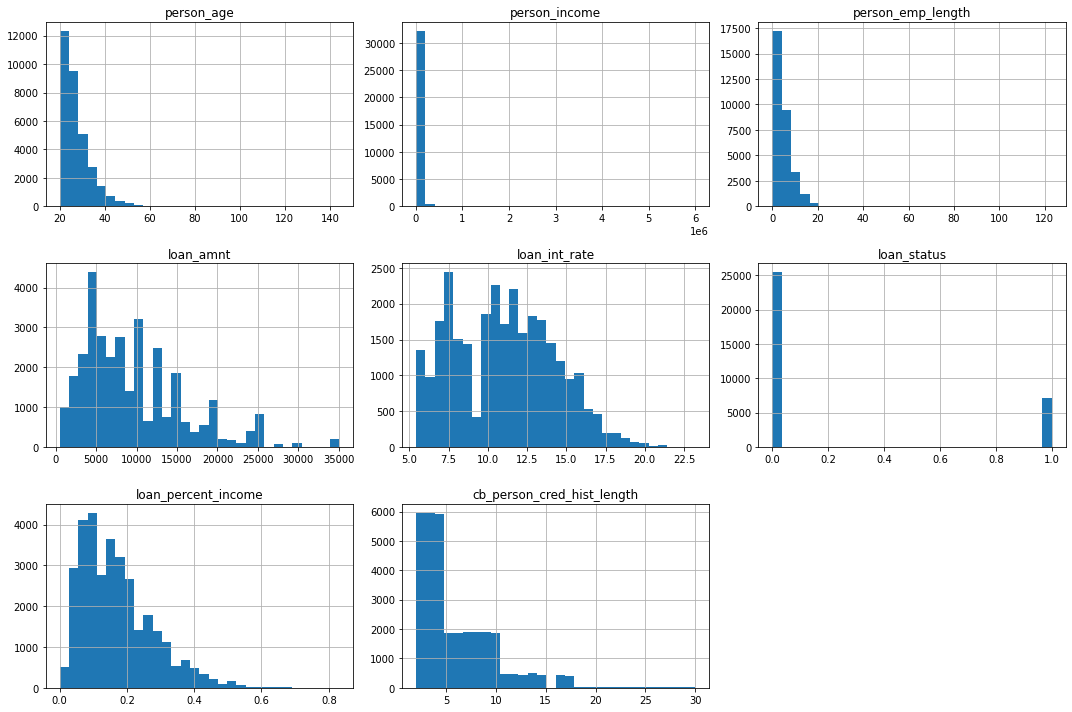

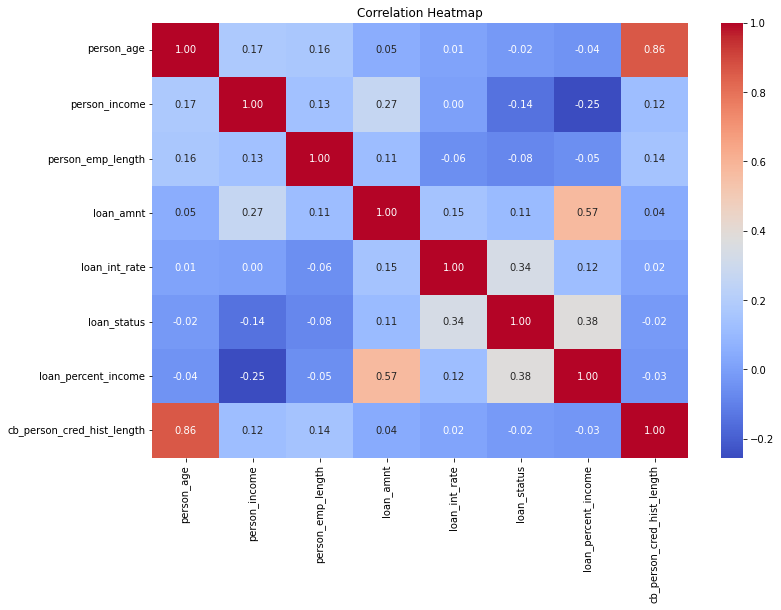

In [9]:
# Cell 3: Visualizations for Numerical Features

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Histograms for all numerical features
numeric_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


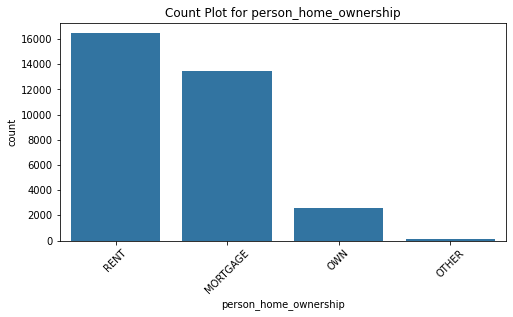

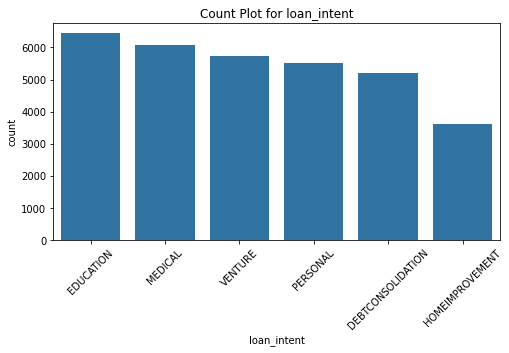

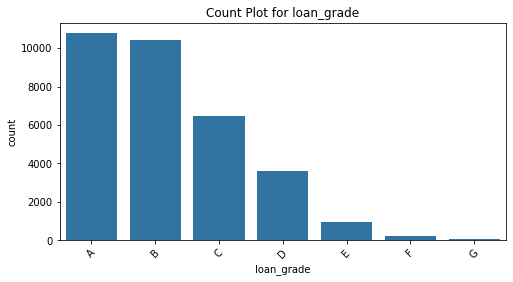

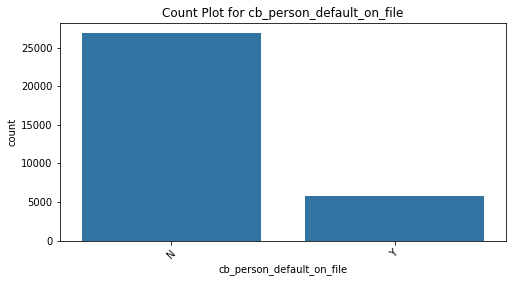

In [10]:
# Cell 4: Analysis of Categorical Variables

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    #print(f"\nValue counts for {col}:")
    #print(df[col].value_counts())
    
    # Plot count plot for each categorical column
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()


<Figure size 720x432 with 0 Axes>

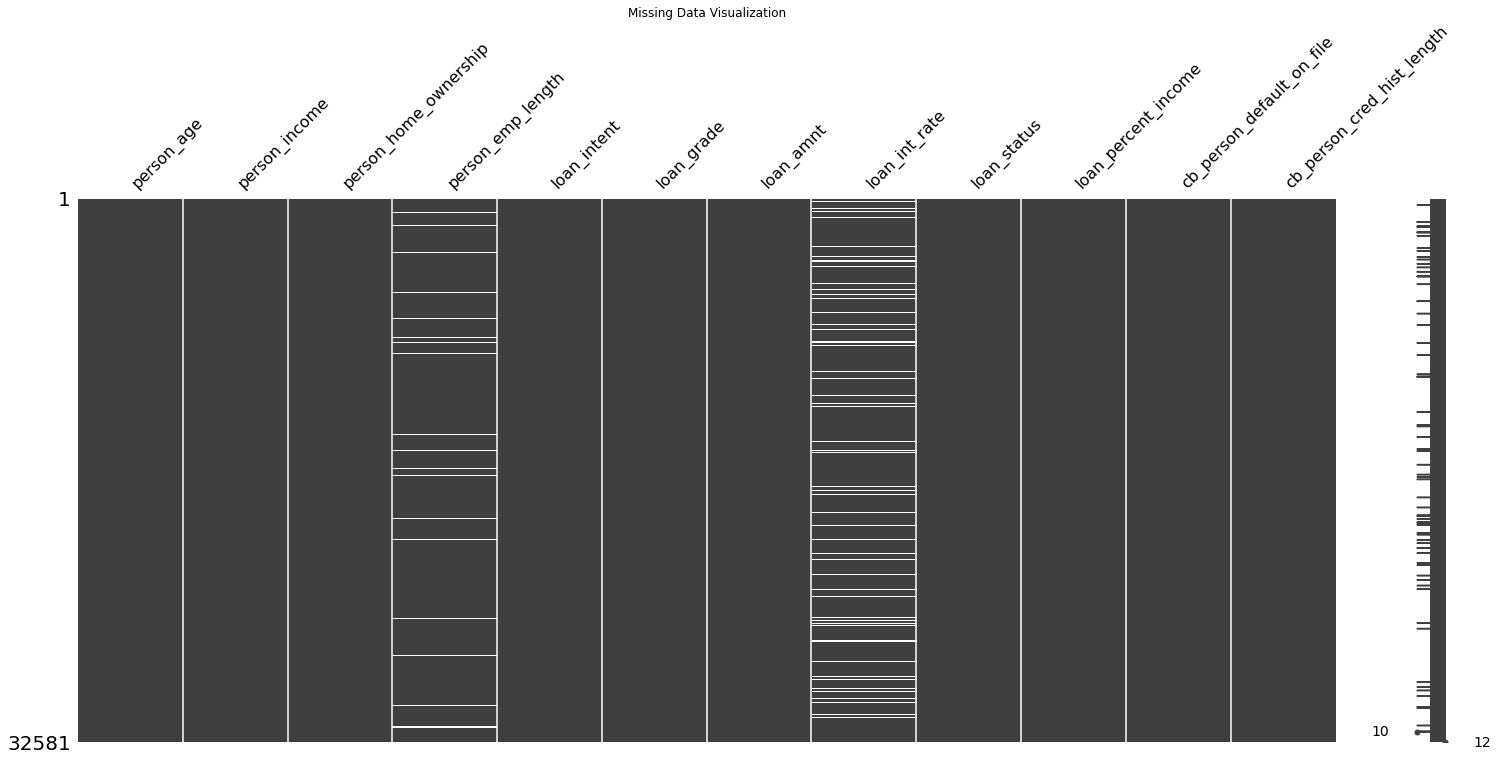

In [11]:
# Cell 5: Visualizing Missing Data
import missingno as msno

plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title("Missing Data Visualization")
plt.show()


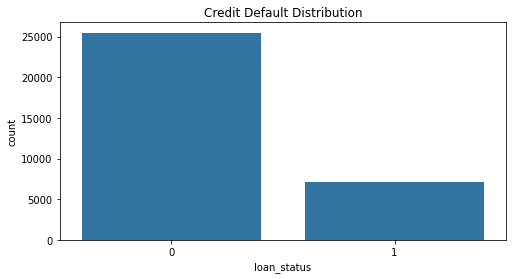


Mean values for numeric features grouped by credit default status:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,,
0,27.807129,70804.361559,4.968745,9237.464178,10.435999,0.0,0.148805,5.837475
1,27.474676,49125.652223,4.137562,10850.502954,13.060207,1.0,0.246889,5.685003


In [12]:
# Cell 6: Credit Default Specific Analysis 

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='loan_status')
plt.title("Credit Default Distribution")
plt.show()

# Select only numeric columns for groupby mean calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
default_group = df.groupby('loan_status')[numeric_cols].mean()

print("\nMean values for numeric features grouped by credit default status:")
default_group

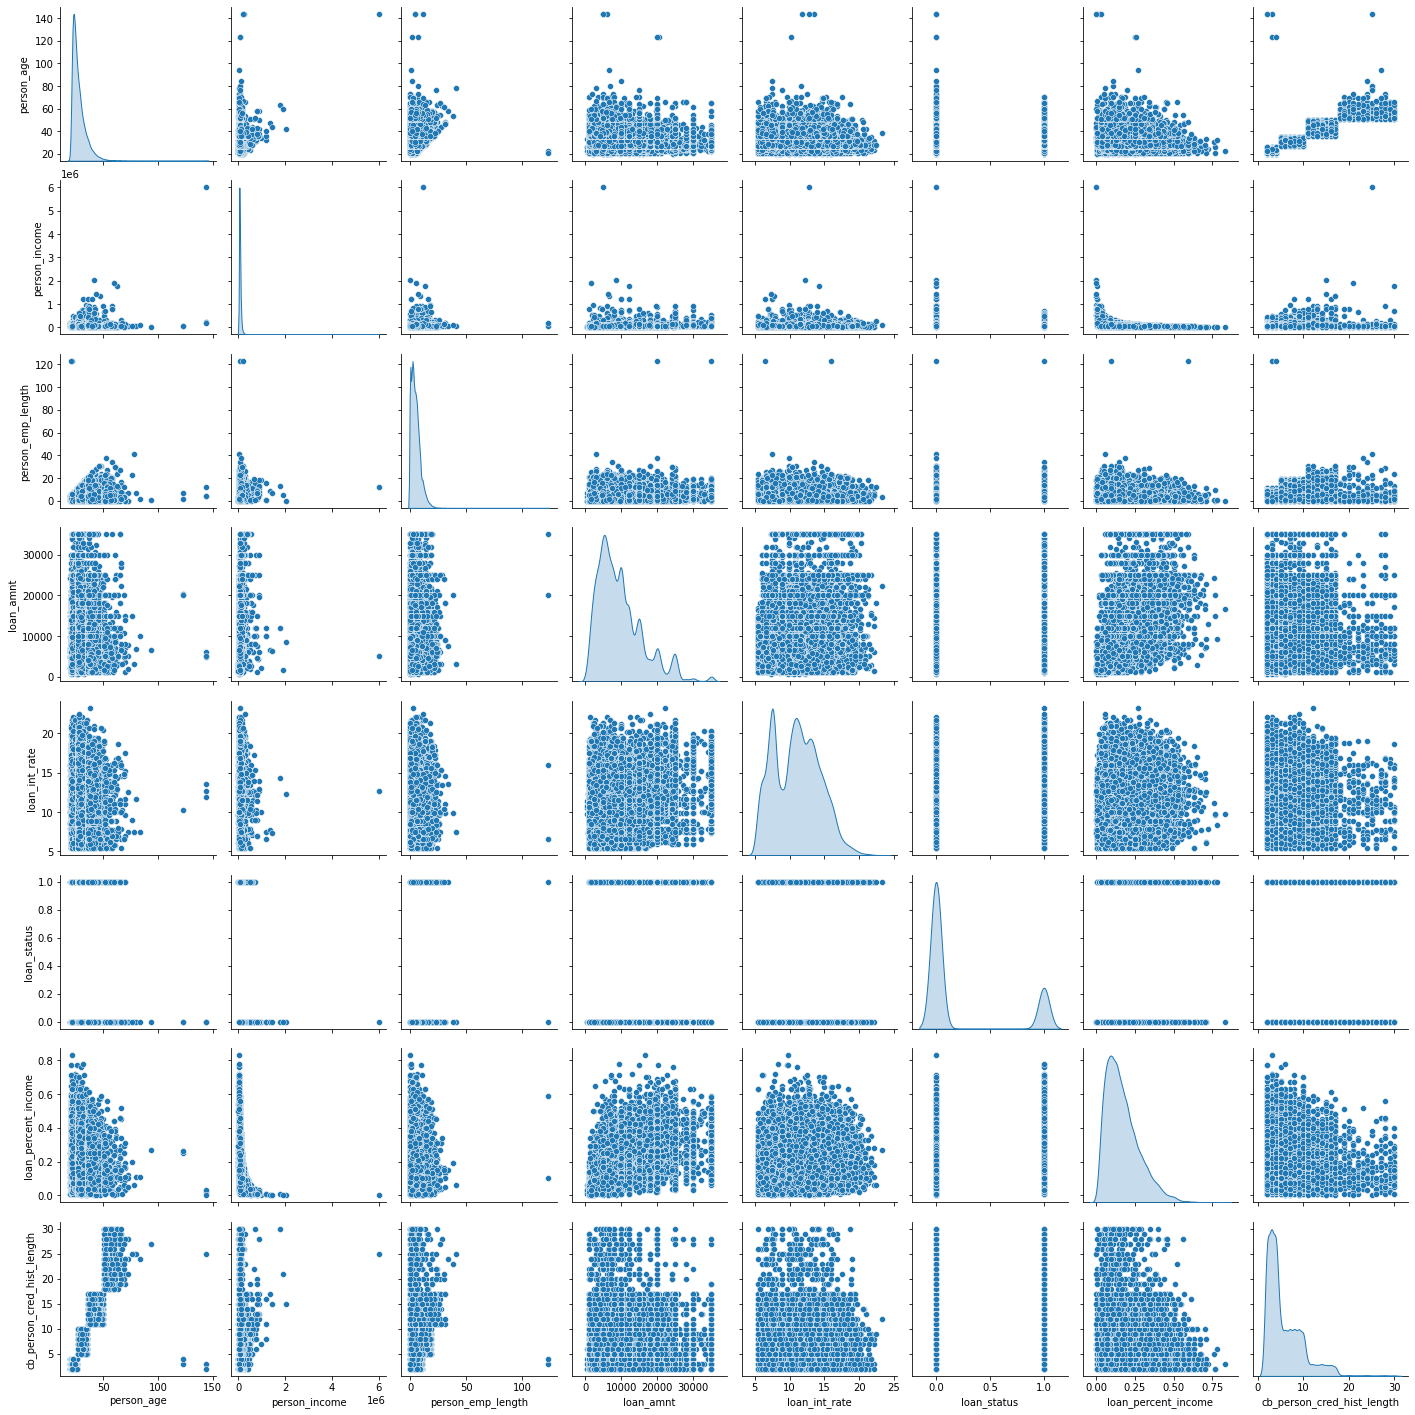

In [13]:
# Cell 7: Pairplot of Numerical Features
# This helps to visualize relationships between numerical variables.
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind="kde")
plt.show()


Ok lol I need to remove some outliers... don't know many people who are 100+ years old, or employed for 100+ years.

In [14]:
# Cell: Removing Outliers

# Define realistic constraints based on domain knowledge
df = df[(df["person_age"] > 0) & (df["person_age"] < 100)]  # Remove ages above 100
df = df[(df["person_emp_length"] > 0) & (df["person_emp_length"] < 65)]  # Max working years ~retirement age
df = df[df["person_income"] > 0]  # Ensure income is positive
df = df[df["loan_amnt"] > 0]  # Loan amount should be positive
df = df[df["loan_int_rate"] > 0]  # Interest rate should be positive
df = df[df["loan_percent_income"] > 0]  # Loan to income ratio should be positive
df = df[df["cb_person_cred_hist_length"] > 0]  # Credit history should be positive

# Reset index after dropping rows
df = df.reset_index(drop=True)

print("Outliers removed. Dataset now has", df.shape[0], "rows.")

Outliers removed. Dataset now has 24918 rows.


I reran the pairplot above, looks much cleaner now!
Let me just deal with the NaN's. 

In [15]:
# Cell: Handling Missing Values with KNN and Group-Based Imputation

import seaborn as sns
from sklearn.impute import KNNImputer

# ### Step 1: Check Missing Values ###
missing_values = df.isnull().sum()
print("Missing Values Before Imputation:\n", missing_values)
"""
# ### Step 2: KNN Imputation for `person_emp_length` ###
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors
df[['person_emp_length']] = knn_imputer.fit_transform(df[['person_emp_length']])

# ### Step 3: Group-Based Median Imputation for `loan_int_rate` ###
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].apply(lambda x: x.fillna(x.median()))

# ### Step 4: Verify Missing Values Are Handled ###
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)

# ### Step 5: Visualize the Imputation Effect ###
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['person_emp_length'], bins=20, kde=True)
plt.title("Distribution of `person_emp_length` After KNN Imputation")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_grade'], y=df['loan_int_rate'])
plt.title("Interest Rates by Loan Grade After Imputation")

plt.tight_layout()
plt.show()
"""
print("")

Missing Values Before Imputation:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64



ok so turns out those outliers were culprit of the missing values. Easy fix.

## Chapter 2.2: Feature Engineering

In [16]:
# ############## 1️⃣ Ratio Features (Financial Stability) ##############

# Debt-to-Income Ratio (DTI) - Measures how much of the borrower's income is being used for the loan
df["DTI"] = df["loan_amnt"] / df["person_income"]

# Credit History to Age Ratio - Reflects the borrower's credit history length relative to their age
df["cred_hist_ratio"] = df["cb_person_cred_hist_length"] / df["person_age"]

# ############## 2️⃣ Interaction Features (Risk Signals) ##############

# Employment Stability - Measures how long the borrower has been employed in relation to their age
df["emp_stability"] = df["person_emp_length"] / df["person_age"]

# Loan Interest Burden - Measures the burden of interest payments based on loan amount and interest rate
df["loan_interest_burden"] = df["loan_amnt"] * df["loan_int_rate"]

# ############## 3️⃣ Categorical Encoding (More Expressive Features) ##############

# One-Hot Encoding for `person_home_ownership` and `loan_intent`
df = pd.get_dummies(df, columns=["person_home_ownership", "loan_intent"], drop_first=True)

# Ordinal Encoding for `loan_grade` based on a predefined scale
loan_grade_mapping = {"A": 7, "B": 6, "C": 5, "D": 4, "E": 3, "F": 2, "G": 1}
df["loan_grade"] = df["loan_grade"].map(loan_grade_mapping)

# ############## 4️⃣ Risk Indicators (Flagging High-Risk Groups) ##############

# Previous Default Flag - Marks if the borrower has defaulted on a loan before
df["prev_default_flag"] = df["cb_person_default_on_file"].apply(lambda x: 1 if x == "Y" else 0)

# High-Interest Loan Flag - Flag for loans with high interest rates (>15%)
df["high_interest_flag"] = (df["loan_int_rate"] > 15).astype(int)

# ############## 5️⃣ Group-Based Features (Peer Risk Levels) ##############

# Mean Default Rate per Loan Grade - Indicates the default rate for each loan grade
grade_default_rate = df.groupby("loan_grade")["loan_status"].mean()
df["grade_default_rate"] = df["loan_grade"].map(grade_default_rate)

# Mean Interest Rate per Income Group - Reflects the average interest rate in different income brackets
df["income_group"] = pd.qcut(df["person_income"], q=3, labels=["low", "medium", "high"])
income_interest_rate = df.groupby("income_group")["loan_int_rate"].mean()
df["income_interest_rate"] = df["income_group"].map(income_interest_rate)
df.drop(columns=["income_group"], inplace=True)  # Drop categorical column after mapping

# ########## 🚀 Next Steps ##########

# Normalize or scale features if necessary
# Check correlations with the target variable `loan_status`
# Consider feature selection techniques for dimensionality reduction



/var/folders/y5/hx36dcps0wj9r1hxwq1x3zj80000gn/T/ipykernel_34985/3508755173.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_interest_rate = df.groupby("income_group")["loan_int_rate"].mean()


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ########### 1️⃣ One-Hot Encoding for Categorical Columns ##############
# List of categorical columns (those with string values like 'N' or 'Y')
categorical_columns = ['cb_person_default_on_file']  # Add more columns if necessary

# One-Hot Encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# ########### 2️⃣ Select Numeric Features ##############
# Separate out the target variable and numeric features
X = df_encoded.drop(columns=['loan_status'])  # Assuming 'loan_status' is your target column
y = df_encoded['loan_status']  # Target variable

# ########### 3️⃣ Scaling Numeric Features ##############
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric columns
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now X_scaled_df contains the scaled numeric features, and you can combine it with the target variable (y) if needed
# Final dataset (scaled features + target variable)
final_df = pd.concat([X_scaled_df, y], axis=1)

# ########### 4️⃣ Check the final DataFrame ##############
final_df.head()


,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,DTI,cred_hist_ratio,emp_stability,loan_interest_burden,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,prev_default_flag,high_interest_flag,grade_default_rate,income_interest_rate,cb_person_default_on_file_Y,loan_status
0,-1.092356,-1.168672,-0.127613,0.187162,-1.381446,0.038956,-0.649613,-0.943128,-0.612119,-1.066361,0.303599,-1.125568,-0.054576,3.48858,-0.974089,2.010241,-0.354223,-0.475625,-0.453852,-0.461996,-0.461548,-0.364829,-0.320676,1.399273,-0.461548,0
1,-0.440697,-1.168672,-1.167460,-0.671084,-0.676524,0.573097,3.784756,-0.694497,3.797390,-0.800864,-1.272081,-0.454834,-0.054576,-0.28665,-0.974089,-0.497453,-0.354223,2.102497,-0.453852,-0.461996,-0.461548,-0.364829,-0.052440,1.399273,-0.461548,1
2,-0.766527,-0.040326,-0.387575,-0.671084,3.944633,1.301752,3.407363,-0.943128,3.434606,-1.155156,-0.206916,4.743544,-0.054576,-0.28665,1.026600,-0.497453,-0.354223,2.102497,-0.453852,-0.461996,-0.461548,2.741013,-0.052440,-0.876416,-0.461548,1
3,-0.603612,-0.264381,0.652273,-0.671084,3.944633,1.005350,3.596060,-0.445866,4.460258,-0.300504,1.061137,4.365697,-0.054576,-0.28665,1.026600,-0.497453,-0.354223,2.102497,-0.453852,-0.461996,2.166620,-0.364829,-0.052440,-0.876416,2.166620,1
4,-1.092356,-1.162616,-0.907499,1.045409,-1.146472,-1.196052,0.765611,-0.943128,0.783483,-1.066361,-0.832709,-1.050111,-0.054576,3.48858,-0.974089,-0.497453,-0.354223,-0.475625,-0.453852,2.164520,-0.461548,-0.364829,-0.702283,1.399273,-0.461548,1


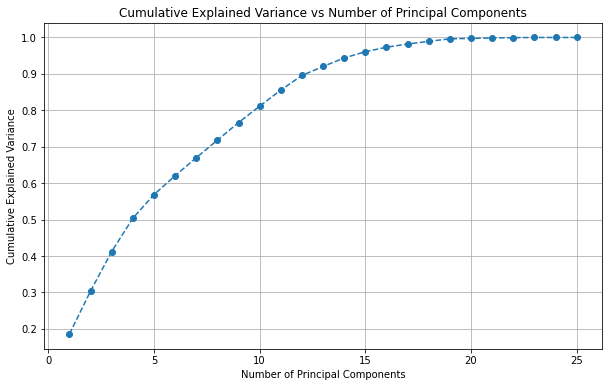

Number of components chosen: 14
Shape of reduced data: (24918, 14)


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ########### 1️⃣ Apply PCA (Dimensionality Reduction) ##############

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled_df)

# ########### 2️⃣ Explained Variance Ratio and Choosing Components ##############
# Plot the explained variance ratio to understand how much variance each component explains
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# ########### 3️⃣ Choose Number of Components Based on Explained Variance ##############
# You can select a number of components that explain a significant amount of variance, say 95%
threshold = 0.95
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum()) if cumulative_variance > threshold)

# Re-initialize PCA with the chosen number of components
pca = PCA(n_components=n_components)

# Apply PCA again with the selected number of components
X_pca_reduced = pca.fit_transform(X_scaled_df)

# ########### 4️⃣ Check Results ##############
# The reduced data is in X_pca_reduced now, which has 'n_components' principal components
print(f"Number of components chosen: {n_components}")
print(f"Shape of reduced data: {X_pca_reduced.shape}")


## Chapter 2.3: Training time

In [19]:
# ########## Train and Evaluate Multiple Classifiers ##########

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and test sets (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=42, stratify=y)

# Define a dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Create an empty list to store results
results = []

# Loop over the models, train, predict and evaluate
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the performance to the results list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert the results list into a DataFrame for a nice summary
results_df = pd.DataFrame(results)

# Display the results DataFrame
print("Model Performance Summary:")
results_df


Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.855404,0.726214,0.483516,0.580520
1,Random Forest,0.904093,0.887850,0.614092,0.726022
2,SVM,0.906501,0.918972,0.601164,0.726846
3,KNN,0.886169,0.820442,0.575953,0.676795


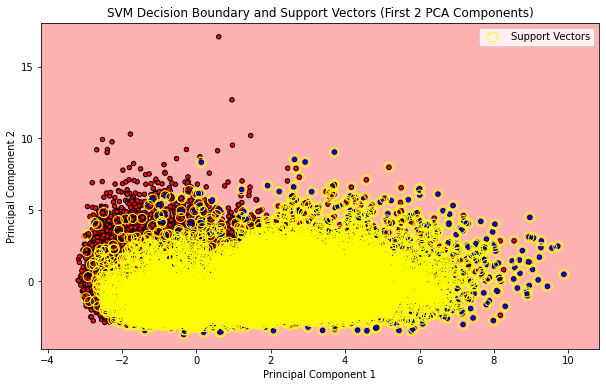

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use only the first 2 principal components for visualization
X_vis = X_pca_reduced[:, :2]

# Train SVM on these 2 dimensions (if your current SVM uses more, retrain a 2D version for visualization)
from sklearn.svm import SVC
svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_vis, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
# Plot support vectors
plt.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='yellow', label='Support Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary and Support Vectors (First 2 PCA Components)')
plt.legend()
plt.show()


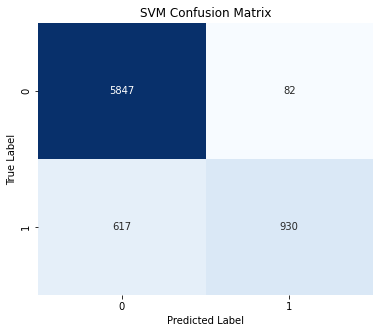

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set using your original SVM model (or retrain one on the full PCA data)
y_pred = models["SVM"].predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Oh... we're not so good at predicting it. Probably should have made more examples of default.

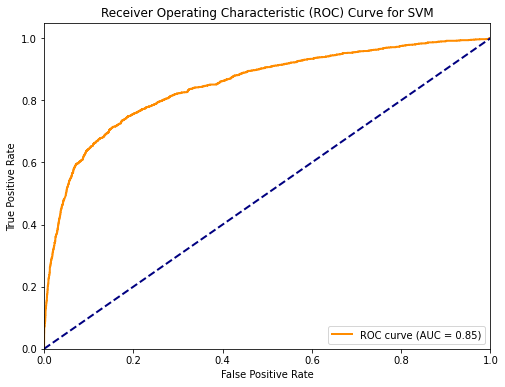

In [22]:
from sklearn.metrics import roc_curve, auc

# For ROC, we need predicted probabilities; retrain SVM with probability=True if not done already.
svm_prob = SVC(kernel='linear', probability=True, random_state=42)
svm_prob.fit(X_train, y_train)
y_prob = svm_prob.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


## Chapter 2.3 Repeated, what about a good old forest?

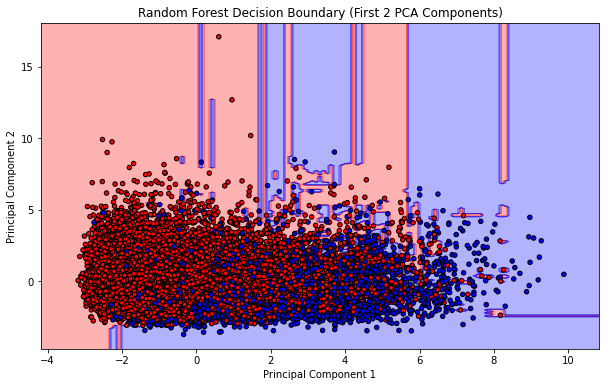

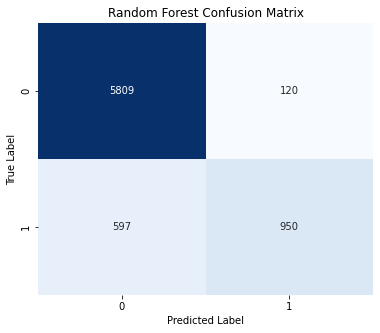

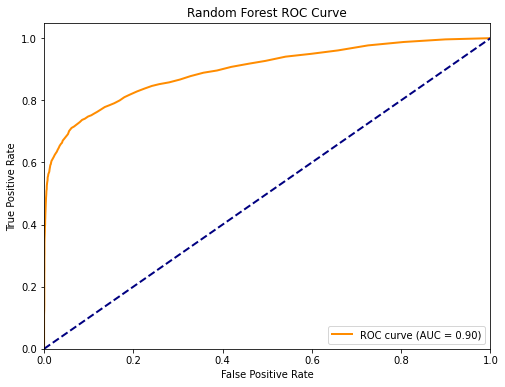

Aggregated Original Feature Importances:
                        Feature  Importance
14   person_home_ownership_RENT    0.168715
13    person_home_ownership_OWN    0.165315
24  cb_person_default_on_file_Y    0.146526
20            prev_default_flag    0.146526
1                 person_income    0.137864
11         loan_interest_burden    0.136716
4                     loan_amnt    0.134217
17          loan_intent_MEDICAL    0.132426
21           high_interest_flag    0.131315
6           loan_percent_income    0.130467
8                           DTI    0.130230
22           grade_default_rate    0.126017
23         income_interest_rate    0.123363
3                    loan_grade    0.117433
5                 loan_int_rate    0.116117
19          loan_intent_VENTURE    0.115120
15        loan_intent_EDUCATION    0.114314
2             person_emp_length    0.109503
10                emp_stability    0.107590
16  loan_intent_HOMEIMPROVEMENT    0.105687
12  person_home_ownership_OTHER    

/var/folders/y5/hx36dcps0wj9r1hxwq1x3zj80000gn/T/ipykernel_34985/788165709.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=original_importance_df, palette='viridis')


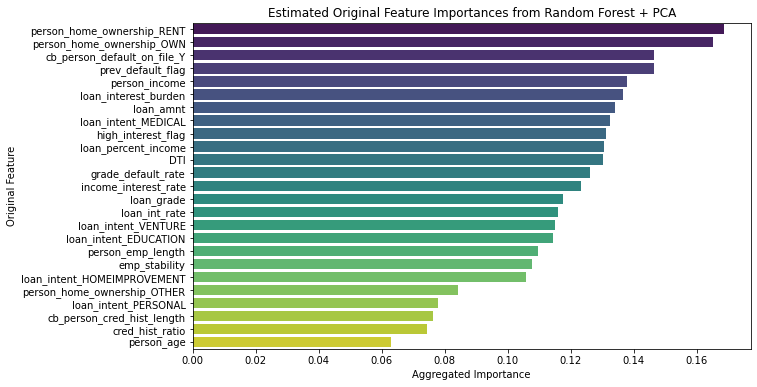

Random Forest Model Performance Summary:
           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Random Forest  0.904093    0.88785  0.614092  0.726022  0.896562


In [30]:
# ############## Random Forest Model Training and Evaluation ##############

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# --- Split Data (using the PCA-reduced features: X_pca_reduced and target y) ---
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=42, stratify=y)

# --- Train Random Forest on the full PCA-reduced data ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ############## 1️⃣ Decision Boundary Visualization (First 2 PCA Components) ##############
# For visualization, we train a Random Forest on only the first 2 PCA components
X_train_2d = X_train[:, :2]  # Use first 2 components
rf_2d = RandomForestClassifier(random_state=42)
rf_2d.fit(X_train_2d, y_train)

# Create a mesh grid over the 2D space
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
plt.title('Random Forest Decision Boundary (First 2 PCA Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# ############## 2️⃣ Confusion Matrix ##############
# Predict using the full Random Forest model on the test set
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ############## 3️⃣ ROC Curve and AUC ##############
# Get probability estimates for the positive class
rf_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# ############## 4️⃣ Feature Importances: Mapping PCA Components Back to Original Features ##############
# Here, we combine the Random Forest importances on the PCA components with the PCA loadings 
# to approximate the importance of each original feature.
# rf_model.feature_importances_ is of shape (n_components,)
# pca.components_ is of shape (n_components, n_original_features) where each row corresponds to one PC.
# We compute the aggregated importance for each original feature as:
#   aggregated_importance_j = sum_i(|loading_{ij}| * importance_i)

# Ensure that the PCA object used for X_pca_reduced is available as 'pca'
rf_importances = rf_model.feature_importances_  # shape (n_components,)
# Compute the aggregated importance per original feature
# X_scaled_df (used earlier for scaling) contains the original feature names
original_importances = np.sum(np.abs(pca.components_.T) * rf_importances, axis=1)
feature_names = X_scaled_df.columns  # these are the original scaled feature names

# Create a DataFrame for original feature importances
original_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': original_importances
}).sort_values(by='Importance', ascending=False)

print("Aggregated Original Feature Importances:")
print(original_importance_df)

# Plot a bar chart of the original feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=original_importance_df, palette='viridis')
plt.title("Estimated Original Feature Importances from Random Forest + PCA")
plt.xlabel("Aggregated Importance")
plt.ylabel("Original Feature")
plt.show()

# ############## 5️⃣ Summary of Model Performance ##############
# Calculate evaluation metrics for the Random Forest model on the full PCA-reduced data
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

results_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [acc],
    'Precision': [prec],
    'Recall': [rec],
    'F1 Score': [f1],
    'ROC AUC': [roc_auc]
})
print("Random Forest Model Performance Summary:")
print(results_rf)


# Chapter 2: Conclusion, Who will owe me money?

Well the most important aspects can be seen above. I could check whats negative or postitive but few interesting takeaways. I wonder if Medical loans get defaulted because they died... thats a somber thought.